## 对京东商城的单日销售量进行预测
机器学习中时间序列预测的方法有很多，在本实验中我们采用 Prophet: Facebook研究团队开发的知名时间序列软件包实现，参见：https://facebook.github.io/prophet/.

## 使用Prophet完成京东商城未来7天销售量的预测

- import some libs and config

In [12]:
import pandas as pd
from prophet import Prophet
from tqdm import tqdm
import pathlib

# ! change it to your specific path :D
ROOT = pathlib.Path('/home/qdl/Desktop/FDU/分布式/DATA/')

timeseries = [
    'time-sale_day',
    'time-sale_hour',
    'time-sale_min'
]

configs = [
    {'periods': 3, 'freq':'D'},
    {'periods': 3*24, 'freq':'H'},
    {'periods': 3*24, 'freq':'H'},
]

- read data in all timeseries 

In [13]:
dfs = list(
   pd.read_csv(ROOT / 'Time-Sale/' / ts, names=['ds', 'y']) 
   for ts in timeseries
)
dfs[0].head()

,ds,y
0,2016-03-12,782
1,2016-03-13,574
2,2016-03-14,1929
3,2016-03-15,2915
4,2016-03-16,1071


- fit models

In [14]:
models = list()
for ts, df in zip(tqdm(timeseries), dfs):
    model = Prophet()
    print('fit model in timeseries: {}'.format(ts))
    model.fit(df)
    models.append(model)

  0%|          | 0/3 [00:00<?, ?it/s]20:11:17 - cmdstanpy - INFO - Chain [1] start processing
20:11:17 - cmdstanpy - INFO - Chain [1] done processing
20:11:17 - cmdstanpy - INFO - Chain [1] start processing
20:11:17 - cmdstanpy - INFO - Chain [1] done processing
20:11:17 - cmdstanpy - INFO - Chain [1] start processing


fit model in timeseries: time-sale_day
fit model in timeseries: time-sale_hour
fit model in timeseries: time-sale_min


20:11:18 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:00<00:00,  5.50it/s]


- construct future data

In [15]:
futures = list() 
for (model, args) in zip(models, configs):
  future = model.make_future_dataframe(**args)
  future.tail()
  futures.append(future)

- prediction

In [16]:
forecasts = list()
for model, future in zip(models, futures):
    forecast = model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    forecasts.append(forecast)

- plot

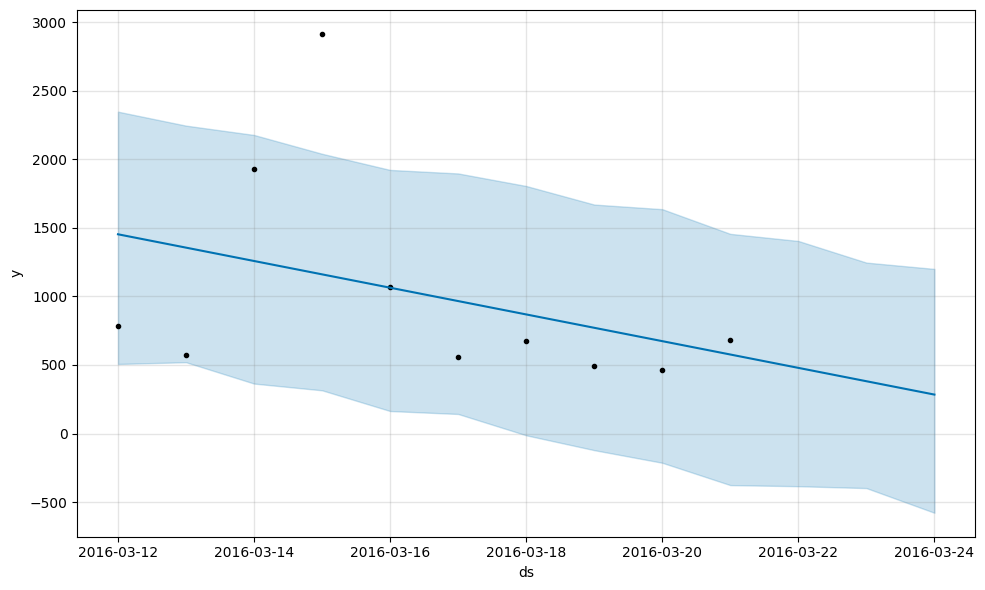

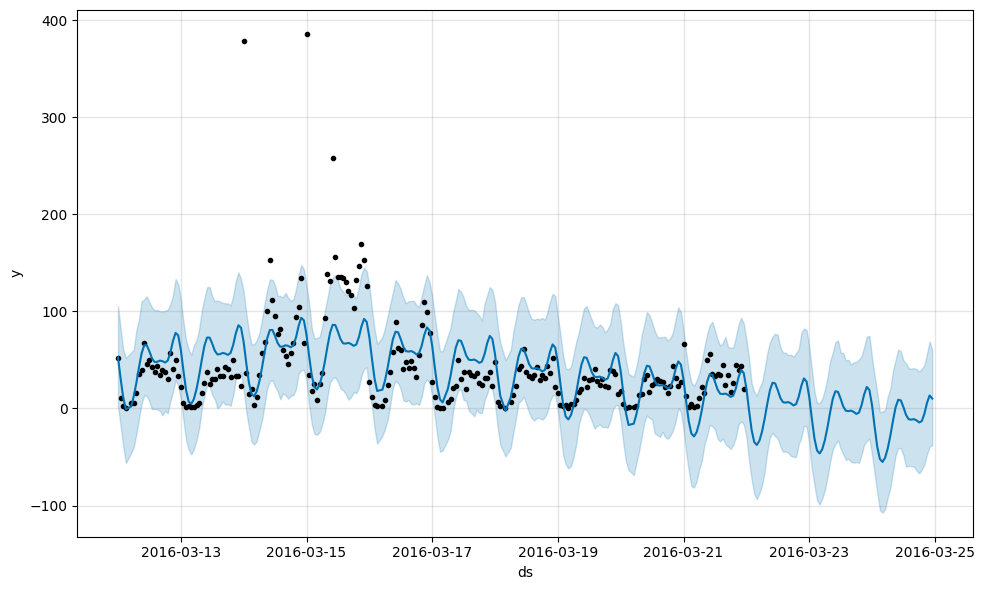

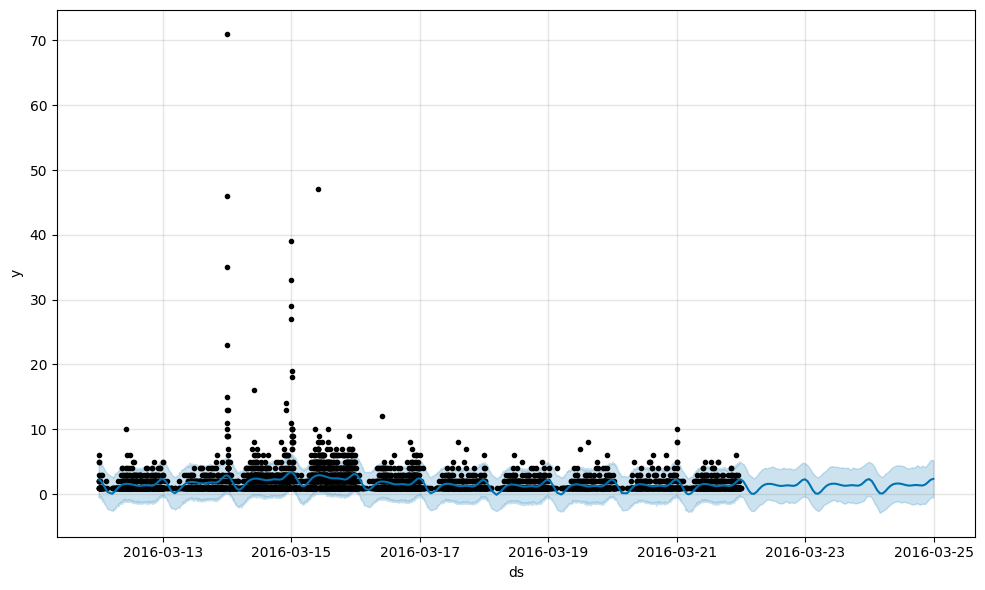

In [17]:
figs = list(
    model.plot(forecast) for (model, forecast) in zip(models, forecasts)
)

- write to csv

In [18]:
RES_PATH = ROOT / 'RES'
RES_PATH.mkdir(exist_ok=True)
for ts, forecast in zip(timeseries, forecasts):
    forecast.to_csv(RES_PATH / f'{ts}.csv')

- Predict by sale_day 

In [19]:
forecasts[0]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-12,1453.518110,507.407932,2348.041444,1453.518110,1453.518110,0.0,0.0,0.0,0.0,0.0,0.0,1453.518110
1,2016-03-13,1356.062858,520.066131,2246.116066,1356.062858,1356.062858,0.0,0.0,0.0,0.0,0.0,0.0,1356.062858
2,2016-03-14,1258.607607,364.267133,2178.025406,1258.607607,1258.607607,0.0,0.0,0.0,0.0,0.0,0.0,1258.607607
3,2016-03-15,1161.152355,315.116098,2040.788772,1161.152355,1161.152355,0.0,0.0,0.0,0.0,0.0,0.0,1161.152355
4,2016-03-16,1063.697103,164.068652,1923.022693,1063.697103,1063.697103,0.0,0.0,0.0,0.0,0.0,0.0,1063.697103
5,2016-03-17,966.241851,142.486992,1897.309316,966.241851,966.241851,0.0,0.0,0.0,0.0,0.0,0.0,966.241851
6,2016-03-18,868.786600,-13.019933,1805.808926,868.786600,868.786600,0.0,0.0,0.0,0.0,0.0,0.0,868.786600
7,2016-03-19,771.331348,-121.409183,1670.325531,771.331348,771.331348,0.0,0.0,0.0,0.0,0.0,0.0,771.331348
8,2016-03-20,673.876096,-213.404815,1636.699566,673.876096,673.876096,0.0,0.0,0.0,0.0,0.0,0.0,673.876096
9,2016-03-21,576.420845,-376.388697,1456.648901,576.420845,576.420845,0.0,0.0,0.0,0.0,0.0,0.0,576.420845


- predict by sale_hour

In [20]:
forecasts[1]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-12 00:00:00,39.629076,1.947863,105.632725,39.629076,39.629076,12.998332,12.998332,12.998332,12.998332,12.998332,12.998332,0.0,0.0,0.0,52.627408
1,2016-03-12 01:00:00,39.957174,-17.629095,82.846420,39.957174,39.957174,-9.012067,-9.012067,-9.012067,-9.012067,-9.012067,-9.012067,0.0,0.0,0.0,30.945108
2,2016-03-12 02:00:00,40.285273,-39.261495,60.467187,40.285273,40.285273,-29.249034,-29.249034,-29.249034,-29.249034,-29.249034,-29.249034,0.0,0.0,0.0,11.036238
3,2016-03-12 03:00:00,40.613371,-56.260053,52.043569,40.613371,40.613371,-41.402103,-41.402103,-41.402103,-41.402103,-41.402103,-41.402103,0.0,0.0,0.0,-0.788732
4,2016-03-12 05:00:00,41.269568,-46.175883,57.485982,41.269568,41.269568,-39.296812,-39.296812,-39.296812,-39.296812,-39.296812,-39.296812,0.0,0.0,0.0,1.972756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2016-03-24 19:00:00,-16.529197,-63.115351,41.037025,-21.752628,-11.682267,3.488897,3.488897,3.488897,3.488897,3.488897,3.488897,0.0,0.0,0.0,-13.040300
302,2016-03-24 20:00:00,-16.894464,-57.426792,44.617936,-22.214483,-11.924313,11.427760,11.427760,11.427760,11.427760,11.427760,11.427760,0.0,0.0,0.0,-5.466704
303,2016-03-24 21:00:00,-17.259731,-47.070838,56.713187,-22.681381,-12.178331,23.079380,23.079380,23.079380,23.079380,23.079380,23.079380,0.0,0.0,0.0,5.819649
304,2016-03-24 22:00:00,-17.624998,-39.232979,69.129647,-23.122573,-12.466654,31.050487,31.050487,31.050487,31.050487,31.050487,31.050487,0.0,0.0,0.0,13.425489


- predict by sale_min

In [21]:
forecasts[2]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-12 00:00:00,1.256906,-0.270863,4.831830,1.256906,1.256906,0.991435,0.991435,0.991435,0.991435,0.991435,0.991435,0.0,0.0,0.0,2.248341
1,2016-03-12 00:01:00,1.256941,-0.371504,4.987094,1.256941,1.256941,0.989649,0.989649,0.989649,0.989649,0.989649,0.989649,0.0,0.0,0.0,2.246590
2,2016-03-12 00:02:00,1.256977,-0.268103,4.693267,1.256977,1.256977,0.987735,0.987735,0.987735,0.987735,0.987735,0.987735,0.0,0.0,0.0,2.244712
3,2016-03-12 00:03:00,1.257012,-0.456800,4.730271,1.257012,1.257012,0.985694,0.985694,0.985694,0.985694,0.985694,0.985694,0.0,0.0,0.0,2.242706
4,2016-03-12 00:04:00,1.257048,-0.309633,4.800079,1.257048,1.257048,0.983524,0.983524,0.983524,0.983524,0.983524,0.983524,0.0,0.0,0.0,2.240572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519,2016-03-24 19:54:00,1.338922,-1.480277,4.377014,0.275802,2.430686,-0.009491,-0.009491,-0.009491,-0.009491,-0.009491,-0.009491,0.0,0.0,0.0,1.329431
5520,2016-03-24 20:54:00,1.340051,-1.515092,4.142228,0.261246,2.458315,0.138439,0.138439,0.138439,0.138439,0.138439,0.138439,0.0,0.0,0.0,1.478490
5521,2016-03-24 21:54:00,1.341180,-0.997150,4.664222,0.253092,2.483537,0.480739,0.480739,0.480739,0.480739,0.480739,0.480739,0.0,0.0,0.0,1.821920
5522,2016-03-24 22:54:00,1.342310,-0.536742,5.246819,0.227961,2.514052,0.858414,0.858414,0.858414,0.858414,0.858414,0.858414,0.0,0.0,0.0,2.200723


In [22]:
!tree $RES_PATH

/home/qdl/Desktop/FDU/分布式/DATA/RES
├── time-sale_day.csv
├── time-sale_hour.csv
└── time-sale_min.csv

0 directories, 3 files
